# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


df = pd.read_csv('demo02.csv')
df = df[['sexo', 'qtd_filhos', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'possui_celular', 'possui_fone_comercial', 'possui_fone',
       'possui_email', 'qt_pessoas_residencia', 'mau', 'posse_de_veiculo_Y',
       'posse_de_imovel_Y']]
df

,sexo,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,posse_de_veiculo_Y,posse_de_imovel_Y
0,M,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False,True,True
1,F,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False,False,True
2,M,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False,True,True
3,F,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False,True,False
4,F,0,Working,Secondary / secondary special,Married,House / apartment,27.482192,4.024658,1,0,1,0,2.0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6765,F,1,Working,Secondary / secondary special,Single / not married,House / apartment,34.857534,3.101370,1,1,1,0,1.0,True,False,True
6766,F,0,Working,Secondary / secondary special,Civil marriage,House / apartment,54.109589,9.884932,1,0,0,0,2.0,True,False,True
6767,F,0,Commercial associate,Secondary / secondary special,Married,House / apartment,43.389041,7.380822,1,1,1,0,2.0,True,False,True
6768,M,0,Working,Secondary / secondary special,Married,House / apartment,30.005479,9.800000,1,1,0,0,2.0,True,True,True


In [2]:
df.dtypes

sexo                      object
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                    float64
tempo_emprego            float64
possui_celular             int64
possui_fone_comercial      int64
possui_fone                int64
possui_email               int64
qt_pessoas_residencia    float64
mau                         bool
posse_de_veiculo_Y          bool
posse_de_imovel_Y           bool
dtype: object

In [3]:
df.mau = df.mau.astype(int)
df.posse_de_veiculo_Y = df.posse_de_veiculo_Y.astype(int)
df.posse_de_imovel_Y = df.posse_de_imovel_Y.astype(int)
df.dtypes

sexo                      object
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                    float64
tempo_emprego            float64
possui_celular             int64
possui_fone_comercial      int64
possui_fone                int64
possui_email               int64
qt_pessoas_residencia    float64
mau                        int32
posse_de_veiculo_Y         int32
posse_de_imovel_Y          int32
dtype: object

In [4]:
df.sexo.unique()

array(['M', 'F'], dtype=object)

In [5]:
df.sexo = df.sexo.map({'F': 1, 'M':0})
df.sexo.unique()

array([0, 1], dtype=int64)

In [6]:
df = df[['sexo', 'idade', 'tempo_emprego', 'possui_celular', 'possui_fone_comercial', 'possui_fone', 'possui_email', 'mau', 
         'posse_de_veiculo_Y', 'posse_de_imovel_Y']]
df

,sexo,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,mau,posse_de_veiculo_Y,posse_de_imovel_Y
0,0,58.832877,3.106849,1,0,0,0,0,1,1
1,1,52.356164,8.358904,1,0,1,1,0,0,1
2,0,46.224658,2.106849,1,1,1,1,0,1,1
3,1,29.230137,3.021918,1,0,0,0,0,1,0
4,1,27.482192,4.024658,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
6765,1,34.857534,3.101370,1,1,1,0,1,0,1
6766,1,54.109589,9.884932,1,0,0,0,1,0,1
6767,1,43.389041,7.380822,1,1,1,0,1,0,1
6768,0,30.005479,9.800000,1,1,0,0,1,1,1


In [7]:
y = df.mau

In [8]:
X = df.drop('mau',axis=1)

In [9]:
clf = DecisionTreeClassifier(random_state=100)
clf

DecisionTreeClassifier(random_state=100)

In [10]:
X

,sexo,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,posse_de_veiculo_Y,posse_de_imovel_Y
0,0,58.832877,3.106849,1,0,0,0,1,1
1,1,52.356164,8.358904,1,0,1,1,0,1
2,0,46.224658,2.106849,1,1,1,1,1,1
3,1,29.230137,3.021918,1,0,0,0,1,0
4,1,27.482192,4.024658,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
6765,1,34.857534,3.101370,1,1,1,0,0,1
6766,1,54.109589,9.884932,1,0,0,0,0,1
6767,1,43.389041,7.380822,1,1,1,0,0,1
6768,0,30.005479,9.800000,1,1,0,0,1,1


In [11]:
clf = clf.fit(X,y)
clf

DecisionTreeClassifier(random_state=100)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [13]:
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(X_train,y_train)
clf

DecisionTreeClassifier(random_state=100)

In [14]:
clf = clf.fit(X_train, y_train)
clf

DecisionTreeClassifier(random_state=100)

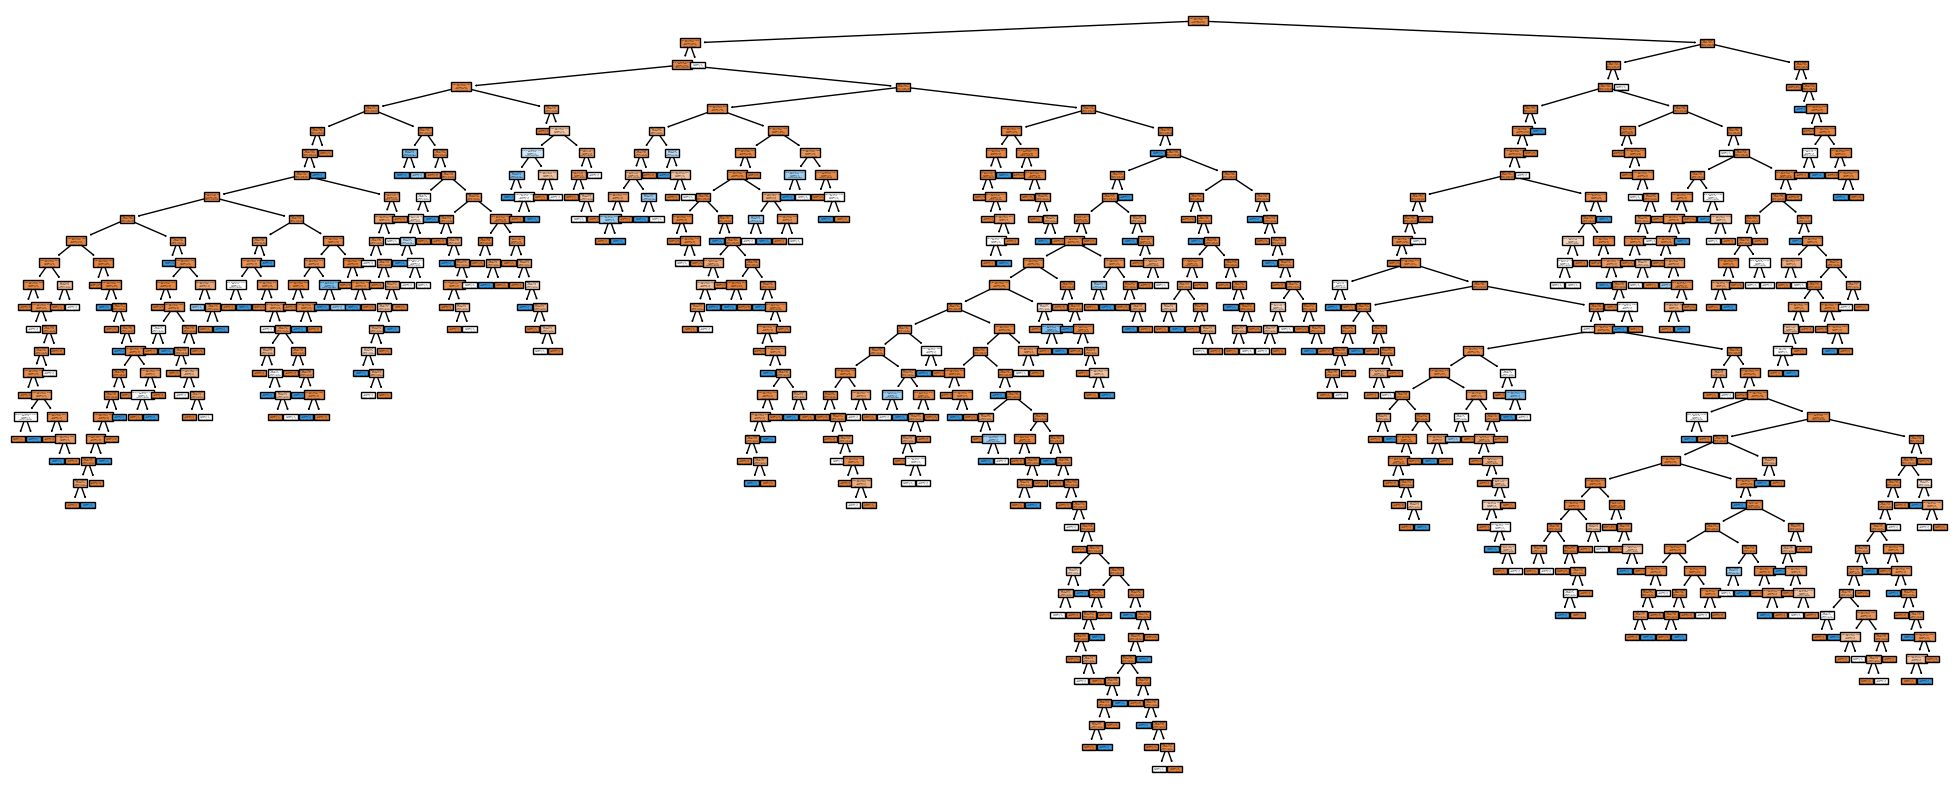

In [15]:
plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
          class_names=['aprovados', 'reprovados'],
          feature_names=list(X.columns));

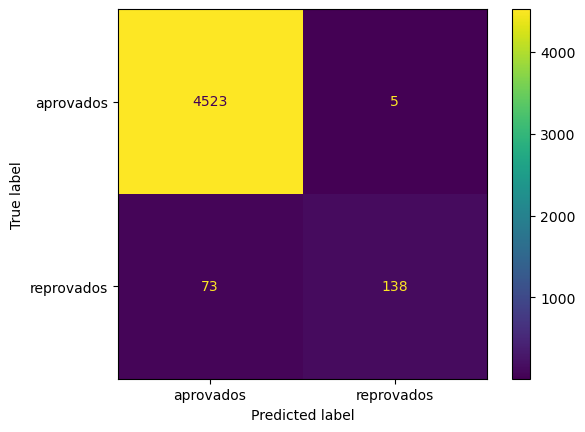

In [16]:
cm = confusion_matrix(y_train, clf.predict(X_train), labels=clf.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['aprovados', 'reprovados'])

MatrizDeConfusao.plot()

In [17]:
predict = clf.predict(X_train)
accuracy_score(y_train, predict)

0.9835408313990294

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [18]:
clf_test = DecisionTreeClassifier(random_state=100)
clf_test = clf_test.fit(X_test, y_test)
clf_test

DecisionTreeClassifier(random_state=100)

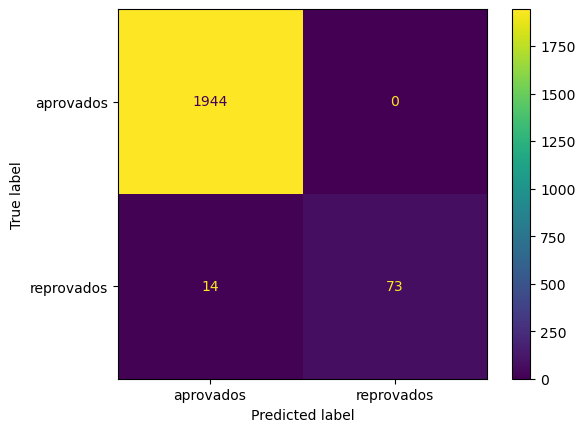

In [22]:
cm = confusion_matrix(y_test, clf_test.predict(X_test), labels=clf.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['aprovados', 'reprovados'])

MatrizDeConfusao.plot()

In [24]:
predict = clf_test.predict(X_test)
accuracy_score(y_test, predict)

0.9931068439192516

In [25]:
clf_podada = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
clf_podada = clf_podada.fit(X_train, y_train)
clf_podada

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)

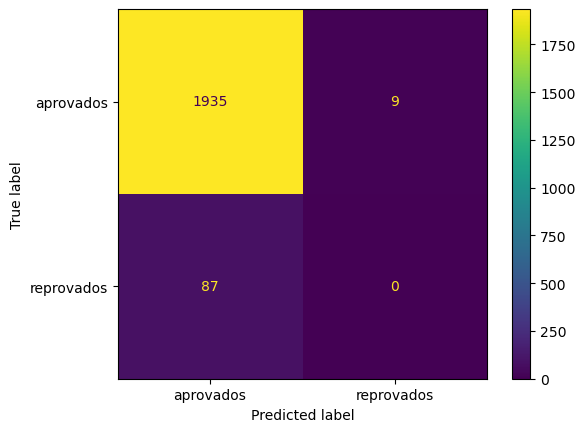

In [26]:
cm = confusion_matrix(y_test, clf_podada.predict(X_test), labels=clf.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['aprovados', 'reprovados'])

MatrizDeConfusao.plot()

In [27]:
predict_test = clf_podada.predict(X_test)
accuracy_score(y_test, predict_test)

0.9527326440177253

In [37]:
predict_list = predict.tolist()
soma = sum(predict_list)
proporcao_pred_reprov = (soma/len(predict_list))*100
print(f'A proporção de classificados como reprovados na predição foi de {proporcao_pred_reprov:.2f}%')

A proporção de classificados como reprovados na predição foi de 3.59%


In [33]:
(9)/(1935+9+87+0)

0.004431314623338257

In [36]:
# Aqui é como ficaria a acurácia se classificassemos todos como bons

(9+1935)/(1935+9+87+0)

0.9571639586410635